<a href="https://colab.research.google.com/github/charlietuckerbha-blip/Final-Data-analysis-report/blob/main/final_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A

filter the dataset

In [27]:
import pandas as pd
df = pd.read_csv("/content/loans_dataset (1).csv")

cols = [
    "interest_rate", "verified_income", "debt_to_income",
    "total_credit_utilized", "total_credit_limit", "public_record_bankrupt",
    "loan_purpose", "term", "inquiries_last_12m", "issue_month",
    "annual_income", "loan_amount", "grade", "emp_length", "homeownership", # Add loan_status to the list
    "loan_status"
]
clean = df[cols].rename(columns={"inquiries_last_12m": "credit_checks"})
clean.to_csv("loans_dataset_clean.csv", index=False)

Summary statistics table

In [26]:
summary = clean.describe(include="all")
print(summary)

        interest_rate  verified_income  debt_to_income  total_credit_utilized  \
count    10000.000000            10000     9976.000000           10000.000000   
unique            NaN                3             NaN                    NaN   
top               NaN  Source Verified             NaN                    NaN   
freq              NaN             4116             NaN                    NaN   
mean        12.427524              NaN       19.308192           51049.063100   
std          5.001105              NaN       15.004851           53636.731172   
min          5.310000              NaN        0.000000               0.000000   
25%          9.430000              NaN       11.057500           19185.500000   
50%         11.980000              NaN       17.570000           36927.000000   
75%         15.050000              NaN       25.002500           65421.000000   
max         30.940000              NaN      469.090000          942456.000000   

        total_credit_limit 

part B

B.1

In [28]:
cols = ["interest_rate", "annual_income", "debt_to_income", "loan_amount"]
sub = df[cols]

stats = sub.agg(["mean", "median", "std", "min", "max"])

print(stats)

        interest_rate  annual_income  debt_to_income   loan_amount
mean        12.427524   7.922215e+04       19.308192  16361.922500
median      11.980000   6.500000e+04       17.570000  14500.000000
std          5.001105   6.473429e+04       15.004851  10301.956759
min          5.310000   0.000000e+00        0.000000   1000.000000
max         30.940000   2.300000e+06      469.090000  40000.000000


In [6]:
for col in ["grade", "verified_income", "homeownership"]:
    print(f"\nColumn: {col}")
    print("Unique value counts:")
    print(df[col].value_counts())


Column: grade
Unique value counts:
grade
B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: count, dtype: int64

Column: verified_income
Unique value counts:
verified_income
Source Verified    4116
Not Verified       3594
Verified           2290
Name: count, dtype: int64

Column: homeownership
Unique value counts:
homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64


B.3

In [29]:
import pandas as pd
import numpy as np

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

In [ ]:
mean_credit_util = df["credit_util"].mean()
print("Mean credit utilization:", mean_credit_util)

prop_nonzero = (df["credit_util"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

In [30]:
import pandas as pd

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

In [31]:
mean_bankruptcy = df["bankruptcy_dummy"].mean()
print("Mean (proportion with prior bankruptcy):", mean_bankruptcy)

prop_nonzero = (df["bankruptcy_dummy"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

Mean (proportion with prior bankruptcy): 0.1215
Proportion non‑zero: 0.1215


B.2

Histograms

Interest_rate distribution

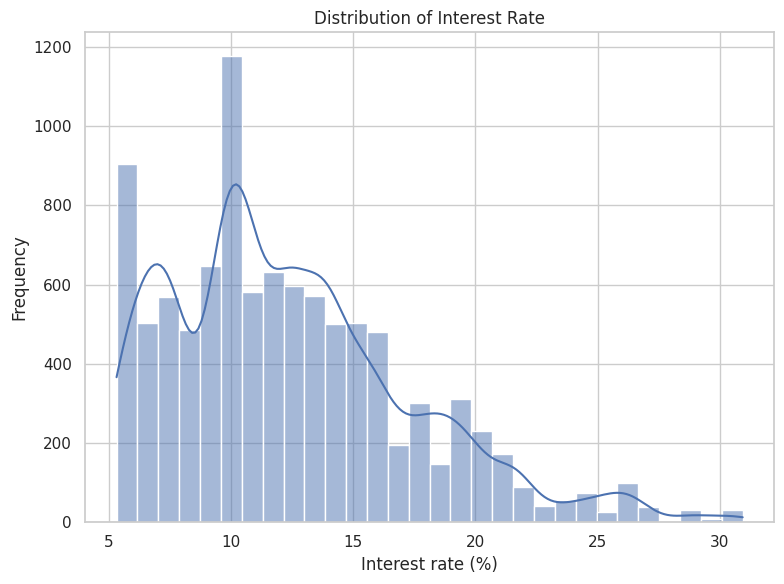

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clean = pd.read_csv("loans_dataset_clean.csv")

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(clean["interest_rate"], bins=30, kde=True)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


annual_income distribution

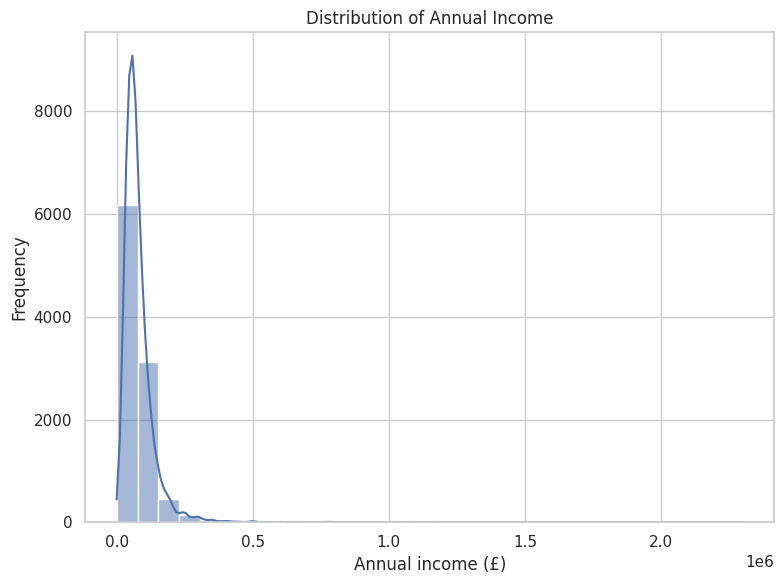

In [8]:

plt.figure(figsize=(8, 6))
sns.histplot(clean["annual_income"], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual income (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Scatterplots

interest_rate vs annual_income

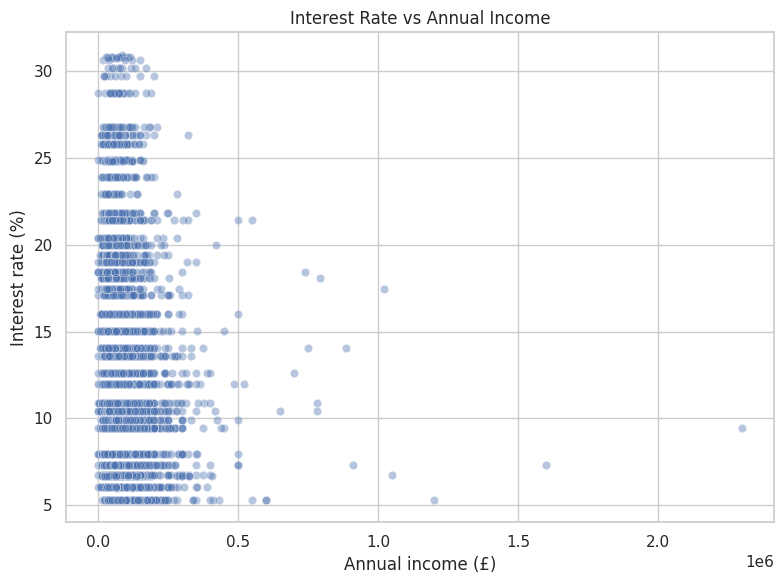

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clean,
    x="annual_income",
    y="interest_rate",
    alpha=0.4
)
plt.title("Interest Rate vs Annual Income")
plt.xlabel("Annual income (£)")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

interest_rate vs debt_to_income

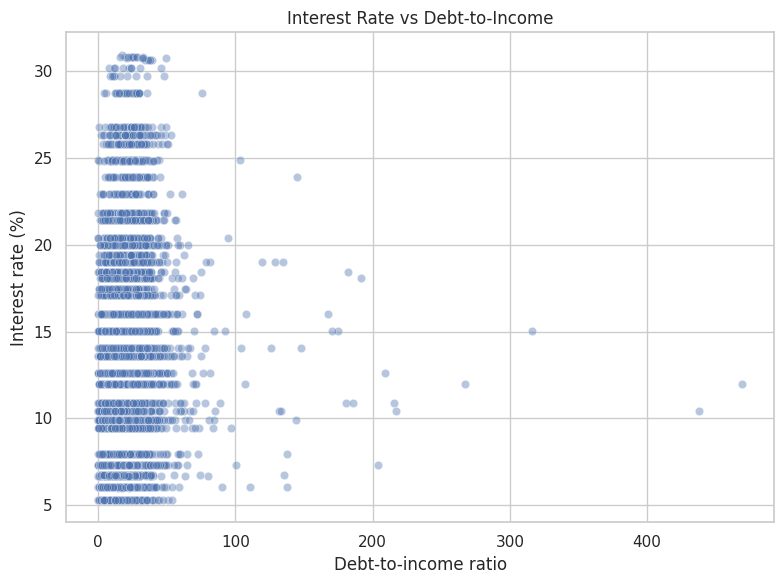

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clean,
    x="debt_to_income",
    y="interest_rate",
    alpha=0.4
)
plt.title("Interest Rate vs Debt-to-Income")
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

Box plots

interest_rate by grade

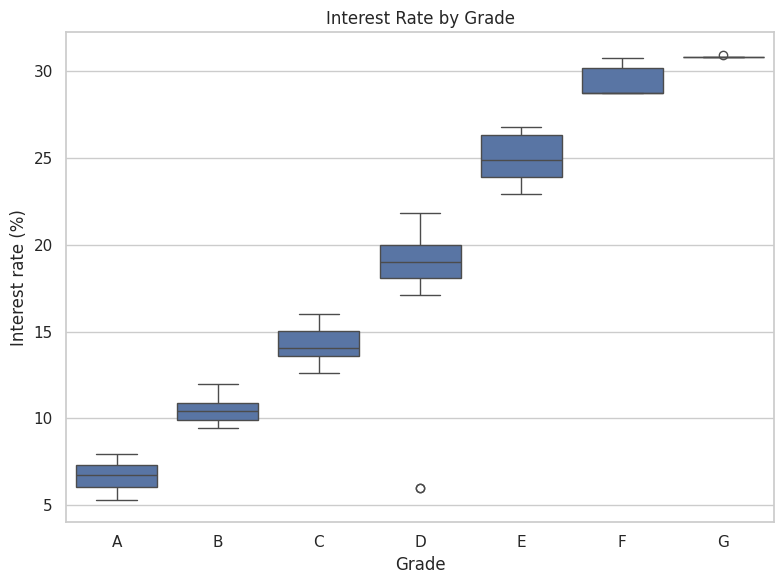

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=clean,
    x="grade",
    y="interest_rate",
    order=sorted(clean["grade"].dropna().unique())
)
plt.title("Interest Rate by Grade")
plt.xlabel("Grade")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

interest_rate by verified_income

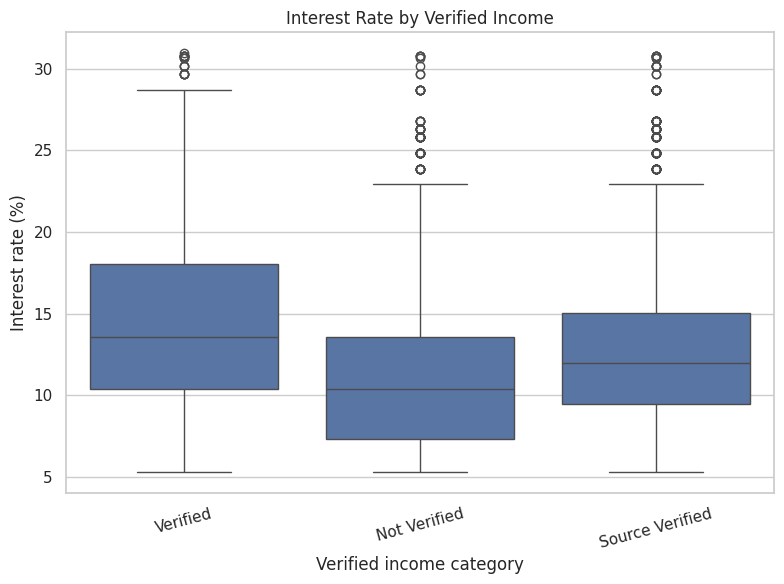

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=clean,
    x="verified_income",
    y="interest_rate"
)
plt.title("Interest Rate by Verified Income")
plt.xlabel("Verified income category")
plt.ylabel("Interest rate (%)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

interest_rate by homeownership

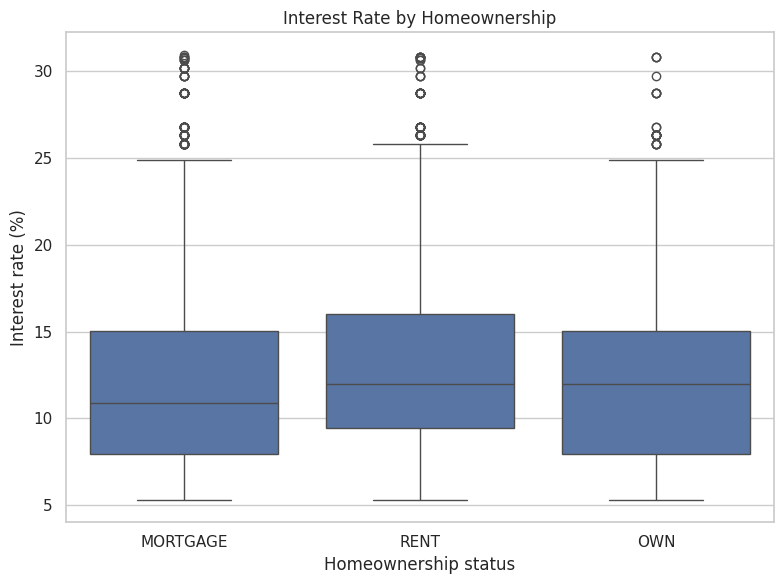

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=clean,
    x="homeownership",
    y="interest_rate"
)
plt.title("Interest Rate by Homeownership")
plt.xlabel("Homeownership status")
plt.ylabel("Interest rate (%)")
plt.tight_layout()
plt.show()

B.3

a.

In [35]:
import pandas as pd
import numpy as np

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

In [37]:
mean_credit_util = df["credit_util"].mean()
print("Mean credit utilization:", mean_credit_util)

prop_nonzero = (df["credit_util"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

Mean credit utilization: 0.40307696513838126
Proportion non‑zero: 0.9972


b.

In [36]:
import pandas as pd

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)
mean_bankruptcy = df["bankruptcy_dummy"].mean()

print("Mean (proportion with prior bankruptcy):", mean_bankruptcy)

prop_nonzero = (df["bankruptcy_dummy"] != 0).mean()
print("Proportion non‑zero:", prop_nonzero)

Mean (proportion with prior bankruptcy): 0.1215
Proportion non‑zero: 0.1215


Part C

Model 1

In [32]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("loans_dataset_clean.csv")
model1_data = df[["interest_rate", "debt_to_income"]].dropna()

y = model1_data["interest_rate"]
X = sm.add_constant(model1_data["debt_to_income"])

model1 = sm.OLS(y, X).fit()


print(model1.summary())

b0 = model1.params["const"]
b1 = model1.params["debt_to_income"]
print(f"\nEstimated equation:")
print(f"interest_rate = {b0:.4f} + {b1:.4f} * debt_to_income")


p_value = model1.pvalues["debt_to_income"]
print(f"\nSlope p-value: {p_value:.4g}")

for alpha in [0.01, 0.05, 0.10]:
    if p_value < alpha:
        decision = "Reject H0 at α = " + str(alpha)
    else:
        decision = "Fail to reject H0 at α = " + str(alpha)
    print(decision)


                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           7.05e-46
Time:                        21:17:16   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5114      0.081    142.

model 2

In [33]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("loans_dataset_clean.csv")
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

data2 = df[["interest_rate", "bankruptcy_dummy"]].dropna()
y = data2["interest_rate"]
X = sm.add_constant(data2["bankruptcy_dummy"])

model2 = sm.OLS(y, X).fit()
print(model2.summary())

b0 = model2.params["const"]
b1 = model2.params["bankruptcy_dummy"]
pval = model2.pvalues["bankruptcy_dummy"]

print(f"\nEstimated equation:")
print(f"interest_rate = {b0:.4f} + {b1:.4f} * bankruptcy_dummy")

print(f"\nSlope p-value: {pval:.4g}")
for alpha in [0.01, 0.05, 0.10]:
    decision = "Reject H0" if pval < alpha else "Fail to reject H0"
    print(f"{decision} at α = {alpha}")

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.47e-06
Time:                        21:17:45   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.3380      0.053  

model 3

In [17]:
dummies = pd.get_dummies(df["verified_income"], prefix="vi", dtype=int)
X3 = pd.concat(
    [dummies["vi_Source Verified"], dummies["vi_Verified"]],
    axis=1
)
X3 = sm.add_constant(X3)
y3 = df["interest_rate"]

m3_data = pd.concat([y3, X3], axis=1).dropna()
y3 = m3_data["interest_rate"]
X3 = m3_data.drop(columns=["interest_rate"])
model3 = sm.OLS(y3, X3).fit()
print("\nModel 3: interest_rate ~ verified_income dummies")
print(model3.summary())

mean_not_verified = df.loc[df["verified_income"] == "Not Verified",
                           "interest_rate"].mean()
print("\nAverage interest_rate (Not Verified):", mean_not_verified)



Model 3: interest_rate ~ verified_income dummies
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          8.92e-134
Time:                        20:09:50   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

model 4

In [18]:


df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)

cols = ["interest_rate", "debt_to_income", "credit_util", "bankruptcy_dummy"]
data = df[cols].dropna()

y = data["interest_rate"]
X = data[["debt_to_income", "credit_util", "bankruptcy_dummy"]]

X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          1.85e-174
Time:                        20:09:50   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8708      0.102  

model 5

In [19]:
df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)
df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)
df["term_60"] = (df["term"] == 60).astype(int)

cols = [
    "interest_rate",
    "debt_to_income",
    "credit_util",
    "bankruptcy_dummy",
    "annual_income",
    "loan_amount",
    "term_60",
    "emp_length",
    "credit_checks",
]
m = df[cols].dropna()

y = m["interest_rate"]
X = m.drop(columns=["interest_rate"])
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

print(model.resid.head())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     363.6
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:09:51   Log-Likelihood:                -26550.
No. Observations:                9182   AIC:                         5.312e+04
Df Residuals:                    9173   BIC:                         5.318e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.8466      0.157  

Part E

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit


df = pd.read_csv("loans_dataset_clean.csv")

df["default_dummy"] = np.where(df["loan_status"] == "Fully Paid", 0, 1)

df["credit_util"] = np.where(
    df["total_credit_limit"] == 0,
    0,
    df["total_credit_utilized"] / df["total_credit_limit"]
)

df["bankruptcy_dummy"] = (df["public_record_bankrupt"] >= 1).astype(int)


df["term_60"] = (df["term"] == 60).astype(int)


grade_dum = pd.get_dummies(df["grade"], prefix="grade", dtype=int)
grade_dum = grade_dum.drop(columns=["grade_A"])

X = pd.concat(
    [
        df[[
            "debt_to_income",
            "credit_util",
            "bankruptcy_dummy",
            "annual_income",
            "loan_amount",
            "term_60",
            "credit_checks", # This column already exists from the loaded CSV
        ]],
        grade_dum
    ],
    axis=1
)


data = pd.concat([df["default_dummy"], X], axis=1).dropna()
y = data["default_dummy"]
X = data.drop(columns=["default_dummy"])
X = sm.add_constant(X)


logit_model = Logit(y, X).fit()
print(logit_model.summary())


odds_ratios = np.exp(logit_model.params)
print("\nOdds ratios:")
print(odds_ratios)

pred_prob = logit_model.predict(X)
pred_class = (pred_prob >= 0.5).astype(int)
accuracy = (pred_class == y).mean()
print(f"\nClassification accuracy (threshold 0.5): {accuracy:.3f}")

Optimization terminated successfully.
         Current function value: 0.179704
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          default_dummy   No. Observations:                 9976
Model:                          Logit   Df Residuals:                     9962
Method:                           MLE   Df Model:                           13
Date:                Mon, 12 Jan 2026   Pseudo R-squ.:                 0.01434
Time:                        20:11:59   Log-Likelihood:                -1792.7
converged:                       True   LL-Null:                       -1818.8
Covariance Type:            nonrobust   LLR p-value:                 1.263e-06
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8590      0.160     17.833      0.000       2.545       3.173
debt_to_inc